<a href="https://colab.research.google.com/github/philipobrien/colab-notebooks/blob/master/Non_Linear_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q torch

In [0]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set()

In [0]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.FloatTensor(X)
y_data = torch.FloatTensor(y.reshape(500, 1))

In [0]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
    plt.title('Non-Linear Dataset')

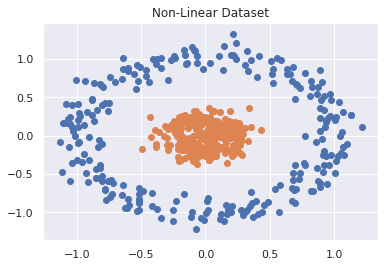

In [0]:
scatter_plot()

In [0]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [0]:
torch.manual_seed(2)
model = Model(2, 4, 1)

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [0]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print(f"epoch: {i}, loss: {loss.item()}")
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0, loss: 0.7148522138595581
epoch: 1, loss: 0.6947312355041504
epoch: 2, loss: 0.6955161094665527
epoch: 3, loss: 0.7014897465705872
epoch: 4, loss: 0.7013992667198181
epoch: 5, loss: 0.697472095489502
epoch: 6, loss: 0.6939275860786438
epoch: 7, loss: 0.6928625106811523
epoch: 8, loss: 0.693941593170166
epoch: 9, loss: 0.6954426765441895
epoch: 10, loss: 0.6958808302879333
epoch: 11, loss: 0.6949241757392883
epoch: 12, loss: 0.693157970905304
epoch: 13, loss: 0.6914014220237732
epoch: 14, loss: 0.6901755332946777
epoch: 15, loss: 0.6894775629043579
epoch: 16, loss: 0.6888664364814758
epoch: 17, loss: 0.6877952814102173
epoch: 18, loss: 0.6859349012374878
epoch: 19, loss: 0.6832882165908813
epoch: 20, loss: 0.6800878047943115
epoch: 21, loss: 0.6766111850738525
epoch: 22, loss: 0.6730255484580994
epoch: 23, loss: 0.6693330407142639
epoch: 24, loss: 0.6653968095779419
epoch: 25, loss: 0.661038875579834
epoch: 26, loss: 0.6561349034309387
epoch: 27, loss: 0.6506633758544922
epoch:

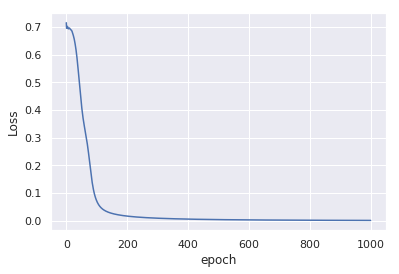

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
model.predict(point)

1